In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

"""Scaling data using min-max scalar, add weights to each data"""

# read csv
file_path = '../data/curated/final_merged_data_3.0.csv'
output_file_path = '../data/curated/final_3.0.csv' 
columns_to_string = ["rent", "Crime rate"] 
df = pd.read_csv(file_path, dtype={col: str for col in columns_to_string})


df['rent'] = df['rent'].str.replace(',', '').astype(float)


# MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ["number_hospital", "number_shopping_center", "number_tram", "number_train", "number_bus", "rent", "Crime Rate"]

# reversed value
scaled_values = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale] = scaled_values
df["Reversed Crime rate"] = 1 - df["Crime Rate"]
df["Reversed rent"] = 1 - df["rent"]

# weights
weights = {
    "number_shopping_center": 0.1,
    "number_hospital": 0.2,
    "number_tram": 0.05,
    "number_train": 0.2,
    "number_bus": 0.1,
    "Reversed rent": 0.65,  # 将 "rent" 的权重从0.35提高为0.5
    "Reversed Crime rate": 0.2
}

# score
df['Score'] = df.apply(lambda row: sum(row[feature] * weights[feature] for feature in weights.keys()), axis=1)


df_sorted = df.sort_values(by='Score', ascending=False)



df_sorted.to_csv(output_file_path, index=False)





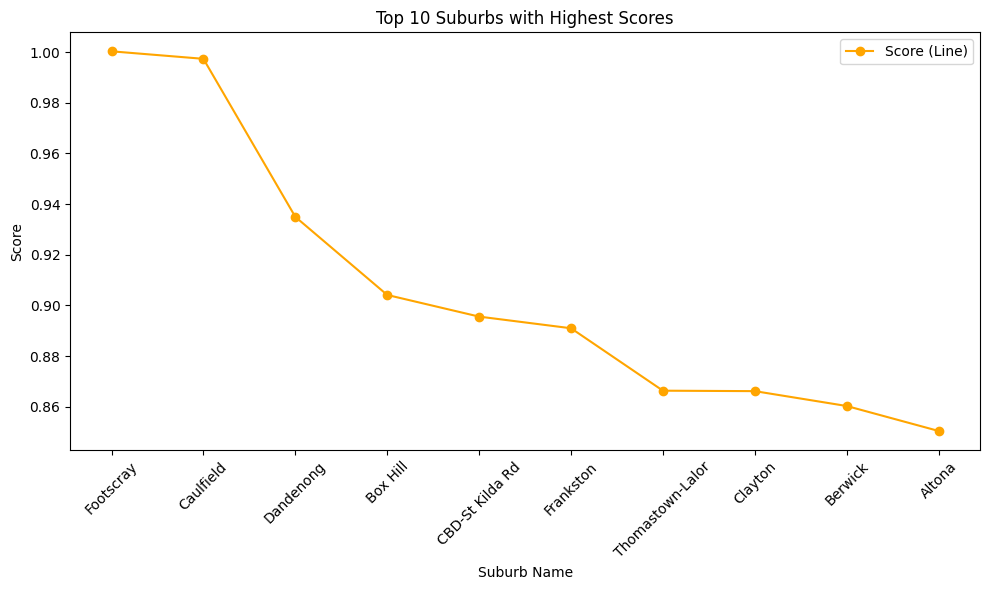

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

"""Ploting graphs for top 10 subrubs in a line plot"""
file_path = '../data/curated/final_3.0.csv' 
df = pd.read_csv(file_path)

# top 10 suburbs
top_10_suburbs = df.head(10)


suburbs = top_10_suburbs['suburb']
scores = top_10_suburbs['Score']

# plots
plt.figure(figsize=(10, 6))



plt.plot(suburbs, scores, marker='o', linestyle='-', color='orange', label='Score (Line)')


plt.legend()

plt.xlabel('Suburb Name')
plt.ylabel('Score')
plt.title('Top 10 Suburbs with Highest Scores')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


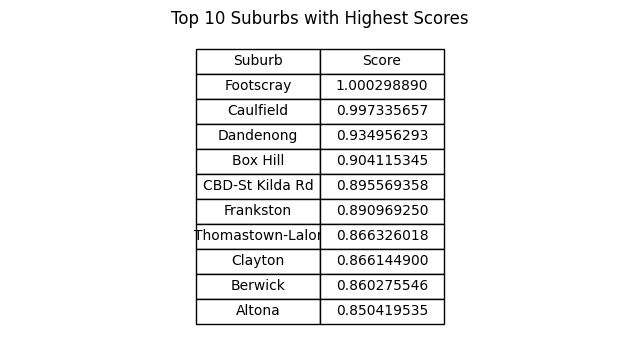

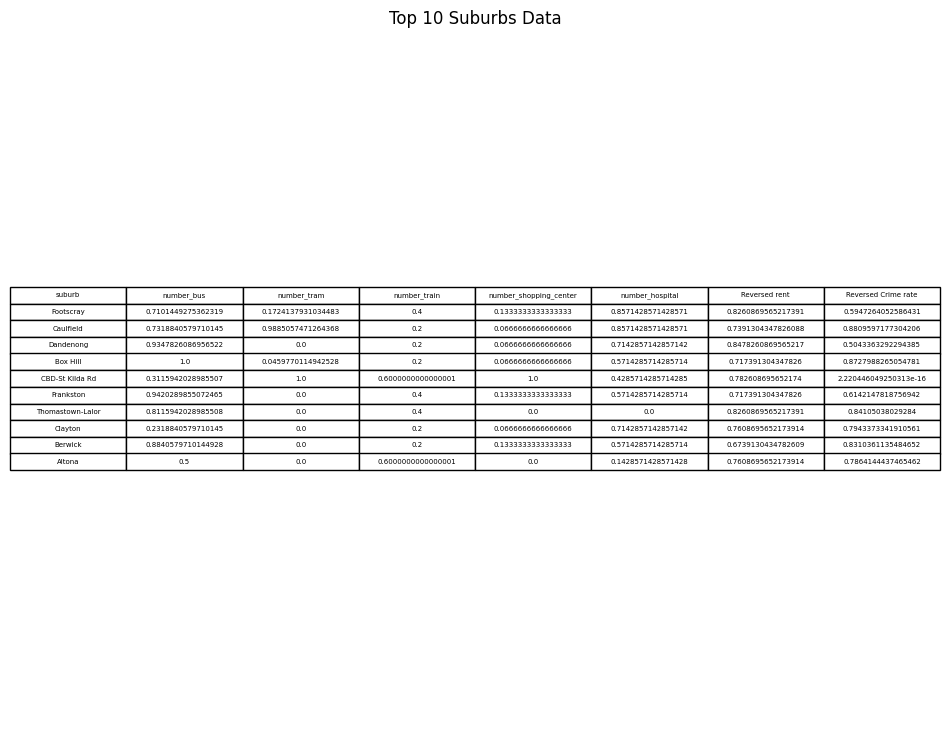

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

"""Ploting data of top 10 suburbs in tables"""
file_path = '../data/curated/final_3.0.csv' 
df = pd.read_csv(file_path)


top_10_suburbs = df.head(10)


suburbs = top_10_suburbs['suburb']
scores = top_10_suburbs['Score'].apply(lambda x: "{:.9f}".format(x))
plt.figure(figsize=(8, 4))

# create table
table_data = [['Suburb', 'Score']] + list(zip(suburbs, scores))
table = plt.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  

plt.axis('off')


plt.title('Top 10 Suburbs with Highest Scores', fontsize=12)


plt.show()

top_10 = df.head(10)

columns_to_display = ["suburb", "number_bus", "number_tram", "number_train", "number_shopping_center", "number_hospital", "Reversed rent", "Reversed Crime rate"]
top_10 = top_10[columns_to_display]


fig, ax = plt.subplots(figsize=(12, 9))
ax.axis('off')  


table_data = [top_10.columns.tolist()] + top_10.values.tolist()
ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

ax.set_title('Top 10 Suburbs Data', fontsize=12)


plt.show()

